In [151]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tools import add_constant

link to data source for county and sector stuff 
* https://data.census.gov/cedsci/table?g=0100000US.050000&d=ANN%20Business%20Patterns%20County%20Business%20Patterns&tid=CBP2018.CB1800CBP&hidePreview=true
* https://www.census.gov/data/datasets/2018/econ/cbp/2018-cbp.html

In [152]:
sector_data = pd.read_csv("CBP2018.CB1800CBP_data_with_overlays_2020-10-29T122511.csv")


C:\Users\yizho\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,5,7,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [153]:
# Types of Sectors
sector_data['NAICS2017_LABEL'].unique()

array(['Meaning of NAICS code', 'Total for all sectors',
       'Agriculture, forestry, fishing and hunting',
       'Mining, quarrying, and oil and gas extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing', 'Information',
       'Finance and insurance', 'Real estate and rental and leasing',
       'Professional, scientific, and technical services',
       'Administrative and support and waste management and remediation services',
       'Educational services', 'Health care and social assistance',
       'Arts, entertainment, and recreation',
       'Accommodation and food services',
       'Other services (except public administration)',
       'Management of companies and enterprises',
       'Industries not classified'], dtype=object)

In [154]:
temp = sector_data[sector_data['EMPSZES_LABEL'] == 'All establishments']
temp['EMP'].value_counts()

13       298
7        295
10       288
8        280
16       280
        ... 
14459      1
14870      1
6806       1
5854       1
3493       1
Name: EMP, Length: 9966, dtype: int64

In [155]:
temp2 = temp[temp['NAICS2017_LABEL'] == 'Total for all sectors']
temp2 = temp2[['GEO_ID','EMP','PAYANN']]
temp2

,GEO_ID,EMP,PAYANN
1,0500000US01001,11397,373865
75,0500000US01003,64354,2212640
190,0500000US01005,6980,248131
248,0500000US01007,3519,145171
304,0500000US01009,6673,219763
...,...,...,...
225603,0500000US72151,1487,28810
225634,0500000US72153,4040,79006
225687,0500000US78010,10503,421174
225770,0500000US78020,1504,59440


In [156]:
temp3 = pd.merge(temp, temp2, on='GEO_ID')

temp3['Employement_%'] = (temp3['EMP_x'].astype('int64') / temp3['EMP_y'].astype('int64') * 100)

In [157]:

temp4 = temp3[temp3['NAICS2017_LABEL'].isin(['Accommodation and food services',
                                     'Finance and insurance',
                                     'Health care and social assistance',
                                     'Manufacturing', 
                                     'Real estate and rental and leasing',
                                     'Retail trade', 
                                     'Transportation and warehousing'])]
temp01 = temp4.groupby('NAME').sum()

In [158]:
df = temp01.sort_values('Employement_%',ascending=False)
temp6 = pd.merge(temp[temp['NAICS2017_LABEL']=='Total for all sectors'][['NAME','EMP']],df,on='NAME')

In [159]:
temp6['EMP'] = temp6['EMP'].astype('int64')
temp6

,NAME,EMP,Employement_%
0,"Autauga County, Alabama",11397,73.738703
1,"Baldwin County, Alabama",64354,67.947602
2,"Barbour County, Alabama",6980,84.326648
3,"Bibb County, Alabama",3519,61.352657
4,"Blount County, Alabama",6673,67.630751
...,...,...,...
3226,"Yabucoa Municipio, Puerto Rico",1487,65.366510
3227,"Yauco Municipio, Puerto Rico",4040,86.064356
3228,"St. Croix Island, United States Virgin Islands",10503,66.314386
3229,"St. John Island, United States Virgin Islands",1504,74.002660


In [160]:
temp6.sort_values(['EMP','Employement_%'], ascending=False)

,NAME,EMP,Employement_%
204,"Los Angeles County, California",3869073,56.779337
608,"Cook County, Illinois",2413447,57.800565
1849,"New York County, New York",2276786,46.591116
2613,"Harris County, Texas",2057494,52.024890
103,"Maricopa County, Arizona",1748608,59.461297
...,...,...,...
2730,"Terrell County, Texas",49,44.897959
1698,"Keya Paha County, Nebraska",44,43.181818
1704,"Loup County, Nebraska",43,34.883721
1797,"Harding County, New Mexico",36,41.666667


In [161]:
#temp6[temp6['EMP'] > 100000]
import numpy as np
cutoff = np.percentile(temp6['EMP'],99)

In [162]:
top_cities = temp6[temp6['EMP'] >= cutoff].sort_values('Employement_%',ascending=False).head(20)
top_cities = top_cities.reset_index(drop = True)


In [163]:
infection_summary = pd.read_csv('SIR_summary.csv')

infection_summary_dictionary = {
    "Kings County, New York":"Kings New York",
    "Clark County, Nevada":"Clark Nevada",
    "San Bernardino County, California":"San Bernardino California",
    "Wayne County, Michigan":"Wayne Michigan",
    "Tarrant County, Texas":"Tarrant Texas",
    "Franklin County, Ohio":"Franklin Ohio",
    "Cuyahoga County, Ohio":"Cuyahoga Ohio",
    "Miami-Dade County, Florida":"Miami-Dade Florida",
    "Bexar County, Texas":"Bexar Texas",
    "Maricopa County, Arizona":"Maricopa Arizona",
    "Cook County, Illinois":"Cook Illinois",
    "Los Angeles County, California":"Los Angeles California",
    "Philadelphia County, Pennsylvania":"Philadelphia Pennsylvania",
    "San Diego County, California":"San Diego California",
    "Suffolk County, Massachusetts":"Suffolk Massachusetts",
    "Broward County, Florida":"Broward Florida",
    "Hennepin County, Minnesota":"Hennepin Minnesota",
    "Allegheny County, Pennsylvania":"Allegheny Pennsylvania",
    "Alameda County, California":"Alameda California",
    "Orange County, California":"Orange California"
}

top_cities['infection_proportion'] = 0
for city in infection_summary_dictionary:
    proportion = infection_summary.loc[infection_summary['County']==infection_summary_dictionary[city],'Infected Proportion'].values[0]
    
    top_cities.at[top_cities['NAME'] == city,'infection_proportion'] = proportion
top_cities.to_csv("Risk Metric Per County.csv")
top_cities
print(top_cities.head())

                                NAME     EMP  Employement_%  \
0             Kings County, New York  655714      68.003123   
1               Clark County, Nevada  879628      66.577917   
2  San Bernardino County, California  617828      65.889536   
3             Wayne County, Michigan  659107      65.137527   
4              Tarrant County, Texas  805016      62.261868   

   infection_proportion  
0              0.029602  
1              0.036036  
2              0.029525  
3              0.023855  
4              0.031776  


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              123.0
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                    9.71e-10
Time:                        07:12:03   Log-Likelihood:                          60.504
No. Observations:                  20   AIC:                                     -119.0
Df Residuals:                      19   BIC:                                     -118.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0005   4.53e-05     11.089      0.000       0.000       0.001
==============================================================================
Omnibus:                       15.745   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.032
Skew:                           1.538   Prob(JB):                     0.000330
Kurtosis:                       6.127   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

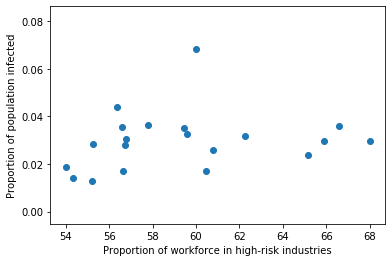

In [164]:

plt.scatter(top_cities['Employement_%'],top_cities['infection_proportion'])
plt.xlabel("Proportion of workforce in high-risk industries")
plt.ylabel("Proportion of population infected")
X = top_cities['Employement_%'].values.reshape(-1, 1) 
y = top_cities['infection_proportion'].values.reshape(-1, 1) 

from statsmodels.api import OLS
OLS(y,X).fit().summary()
#Significant relationship between exposure in high-risk industries vs proportion of population infected

In [165]:
covid_dictionary = {
    "Kings County, New York":"Kings",
    "Clark County, Nevada":"Clark",
    "San Bernardino County, California":"San Bernardino",
    "Wayne County, Michigan":"Wayne",
    "Tarrant County, Texas":"Tarrant",
    "Franklin County, Ohio":"Franklin",
    "Cuyahoga County, Ohio":"Cuyahoga",
    "Miami-Dade County, Florida":"Miami-Dade",
    "Bexar County, Texas":"Bexar",
    "Maricopa County, Arizona":"Maricopa",
    "Cook County, Illinois":"Cook",
    "Los Angeles County, California":"Los Angeles",
    "Philadelphia County, Pennsylvania":"Philadelphia",
    "San Diego County, California":"San Diego",
    "Suffolk County, Massachusetts":"Suffolk",
    "Broward County, Florida":"Broward",
    "Hennepin County, Minnesota":"Hennepin",
    "Allegheny County, Pennsylvania":"Allegheny",
    "Alameda County, California":"Alameda",
    "Orange County, California":"Orange"
}

ue_dictionary = {
    "Kings County, New York":"NYKING7URN.csv",
    "Clark County, Nevada":"NVCLAR3URN.csv",
    "San Bernardino County, California":"CASANB1URN.csv",
    "Wayne County, Michigan":"MIWAYN3URN.csv",
    "Tarrant County, Texas":"TXTARR9URN.csv",
    "Franklin County, Ohio":"OHFRAN0URN.csv",
    "Cuyahoga County, Ohio":"OHCUYA5URN.csv",
    "Miami-Dade County, Florida":"FLMIAM6URN.csv",
    "Bexar County, Texas":"TXBEXA9URN.csv",
    "Maricopa County, Arizona":"AZMARI3URN.csv",
    "Cook County, Illinois":"ILCOOK1URN.csv",
    "Los Angeles County, California":"CALOSA7URN.csv",
    "Philadelphia County, Pennsylvania":"PAPHIL5URN.csv",
    "San Diego County, California":"CASAND5URN.csv",
    "Suffolk County, Massachusetts":"MASUFF5URN.csv",
    "Broward County, Florida":"FLBROW5URN.csv",
    "Hennepin County, Minnesota":"MNHENN3URN.csv",
    "Allegheny County, Pennsylvania":"PAALLE3URN.csv",
    "Alameda County, California":"CAALAM1URN.csv",
    "Orange County, California":"CAORAN7URN.csv"
}



In [166]:
master = pd.DataFrame(columns=['DATE'])

for county,file in zip(ue_dictionary.keys(),ue_dictionary.values()):
    temp = pd.read_csv('unemployment_data/'+file)
    column_name = file.split('.')[0]
    temp = temp.rename(columns={column_name: "ue_rate"})
    temp['County'] = county
    if master.empty == True:
        master = temp
    else:
        master = master.append(temp,ignore_index=True)

master.reset_index(inplace=True)


In [167]:
master['DATE'] = pd.to_datetime(master['DATE'])

master = master[master['DATE'] >= pd.to_datetime('2020-01-01')]

In [168]:
master

,index,DATE,ue_rate,County
4,4,2020-01-01,3.6,"Kings County, New York"
5,5,2020-02-01,3.5,"Kings County, New York"
6,6,2020-03-01,4.2,"Kings County, New York"
7,7,2020-04-01,14.7,"Kings County, New York"
8,8,2020-05-01,18.2,"Kings County, New York"
...,...,...,...,...
7019,7019,2020-05-01,14.7,"Orange County, California"
7020,7020,2020-06-01,13.6,"Orange County, California"
7021,7021,2020-07-01,12.4,"Orange County, California"
7022,7022,2020-08-01,9.5,"Orange County, California"


In [169]:
vocid = pd.read_csv('cleaned_jhu_data.csv')
vocid

,Date,Kings County NY Cases,Kings County NY Deaths
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
278,2020-10-26,74703,7385
279,2020-10-27,74903,7387
280,2020-10-28,75169,7390
281,2020-10-29,75517,7393


In [170]:
vocid = vocid.rename(columns={'Unnamed: 0':'DATE'})
vocid['DATE'] = pd.to_datetime(vocid['DATE']);

KeyError: 'DATE'

In [ ]:
vocid = vocid.groupby(vocid['DATE'].dt.month).sum().diff()


In [ ]:
temp1 = vocid[['Kings New York Cases', 'Kings New York Deaths']]
void

County | DATE | UE_Rate | covid_cases | covid_deaths

In [ ]:
vocid.to_csv('covid_aggr.csv')
master.to_csv('ue_data.csv')

In [ ]:
vocid

In [ ]:
master_new = pd.read_csv('master.csv')


In [ ]:
master_new

In [ ]:
master_new = master_new[master_new['covid_cases']>2]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(np.log(master_new['diff_covid_cases']),master_new['ue_rate'])
plt.legend()
plt.ylabel('Unemployment Rate', fontsize=18)
plt.xlabel('Log(Net New Covid Cases)', fontsize=18)

## Model Building

In [ ]:
counties = ['Kings County, New York', 'Clark County, Nevada',
       'San Bernardino County, California', 'Wayne County, Michigan',
       'Tarrant County, Texas', 'Franklin County, Ohio',
       'Cuyahoga County, Ohio', 'Miami-Dade County, Florida',
       'Bexar County, Texas', 'Maricopa County, Arizona',
       'Cook County, Illinois', 'Los Angeles County, California',
       'Philadelphia County, Pennsylvania',
       'San Diego County, California', 'Suffolk County, Massachusetts',
       'Broward County, Florida', 'Hennepin County, Minnesota',
       'Allegheny County, Pennsylvania', 'Alameda County, California',
       'Orange County, California']

results = {}
for i in counties:
    temp = master_new[master_new['County'] == i]
    result_list = []
    for j in range(100):
        temp_boot =  temp.sample(len(temp), replace=True)
        y = temp_boot.ue_rate
        x = np.log(temp_boot.diff_covid_cases)
        #x = temp.diff_covid_cases
        X = add_constant(x)
    
        reg = LinearRegression().fit(X, y)
    
        rsquared = reg.score(X,y)
        result_list.append(rsquared)
    
    results[i] = sum(result_list) / len(result_list)
    

In [ ]:
results

In [ ]:
predline = reg.predict(X)

In [ ]:
temp = master_new[master_new['County'] == 'Cook County, Illinois']

y = temp.ue_rate
x = temp.diff_covid_cases
X = add_constant(x)

reg = LinearRegression().fit(X, y)

predline = reg.predict(X)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(temp['diff_covid_cases'],temp['ue_rate'])
plt.legend()
plt.ylabel('Unemployment Rate', fontsize=18)
plt.xlabel('Log(Net New Covid Cases)', fontsize=18)


plt.plot(X, predline, c= "red")

#plt.gca().invert_yaxis()
plt.show()

In [ ]:
reg.score(X,y)

In [ ]:
master_new['County'].unique()